In [10]:
import matplotlib.pyplot as plt
import numpy as np
import torch as t
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from PCA import classify_sym, type_to_color
%matplotlib inline

In [11]:
unitaries_prods = np.load("/Users/jonathanlu/Documents/symmetry-learning/unitaries.npy")
NRUN, NUM_QUBITS = unitaries_prods.shape[:2]
sym_labels = np.array([type_to_color(classify_sym(np.abs(unitary_prod))) \
                            for unitary_prod in unitaries_prods])
print(f"{NRUN} symmetries on a {NUM_QUBITS}-qubit state")

100 symmetries on a 3-qubit state


In [12]:
# Project from the Lie group to 2D space
unitary_vecs = StandardScaler().fit_transform(np.abs(unitaries_prods.reshape((NRUN, -1))))
pca = PCA(n_components=2)
fit = pca.fit_transform(unitary_vecs)
explained_variance = pca.explained_variance_ratio_
print(f"PCA explained variance ratio = {explained_variance}")

PCA explained variance ratio = [9.99999999e-01 2.28823119e-10]


In [16]:
fit[:,0]

array([-3.46409019, -3.46408714, -3.46413472,  3.46411959, -3.46413364,
        3.46412417,  3.46407999,  3.46409241, -3.46407891,  3.46413933,
       -3.4640707 ,  3.4641603 ,  3.46401655,  3.46412748, -3.46408796,
        3.46413397, -3.46410679, -3.46410264,  3.46406655, -3.46408647,
        3.4641606 , -3.46409836,  3.46418916,  3.46415707, -3.4640537 ,
       -3.46410801,  3.46410913, -3.46409956,  3.46403719,  3.46411865,
        3.4640505 ,  3.46412376,  3.46407157, -3.46414277,  3.46405097,
        3.46407919,  3.46413013,  3.46405847,  3.46408284, -3.46413242,
        3.46410265,  3.46405737,  3.46409415,  3.46411386,  3.46411237,
       -3.46410725, -3.46407071,  3.46412582, -3.46415877,  3.46408645,
       -3.46411647, -3.46409588, -3.46408486,  3.46411333,  3.46416621,
        3.46412467, -3.46412334,  3.46407451, -3.4640686 , -3.46410537,
        3.46403379, -3.46409445,  3.46412565, -3.46407114, -3.4641165 ,
        3.46409077, -3.46414127, -3.46413837, -3.46410138,  3.46

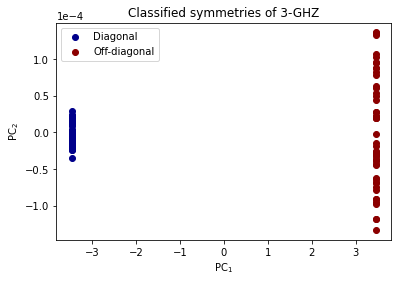

In [30]:
plt.clf()
plt.title("Classified symmetries of 3-GHZ")
plt.xlabel(r'PC$_1$')
plt.ylabel(r'PC$_2$')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, -4))
clab = [('darkblue', 'Diagonal'), ('darkred', 'Off-diagonal')]
for color, label in clab:
    idxs = np.where(sym_labels == color)
    plt.scatter(fit[idxs,0], fit[idxs,1], c=color, label=label)
plt.legend()
plt.savefig("/Users/jonathanlu/Documents/symmetry-learning/Figures/pca.png")
plt.show()